## Gather

In [1]:
# Importing the required libraries that we are going to use:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import time
import json
import re
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Gather Twitter archive

In [2]:
# Importing the twitter-archive-enhanced.csv file into a DataFrame.
# This file is provided by Udacity and it is located in our project folder.
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv", sep="," )

#### Gather Image predictions

In [ ]:
# Downloading the tweet image predictions hosted on Udacity's servers:
tweet_image_prediction_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(tweet_image_prediction_url)

In [ ]:
# We then save the image-predictions.tsv locally:
with open(os.path.join(os.getcwd(), 
         tweet_image_prediction_url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [3]:
# Importing the predictions into a DataFrame
image_predictions = pd.read_csv("image-predictions.tsv", sep="\t" )

#### Gather Tweets from Twitter API

In [ ]:
# Now we need to fetch the tweets from the Twitter API.
# But before doing this, we firstly need to authenticate ourselves 
# in order to use the API. To begin the process we need to register 
# our client application with Twitter. We create a new application 
# and we generate the required keys (which are not displayed for 
# obvious reasons):

In [ ]:
consumer_key = '.....'
consumer_secret = '.....'
access_token = '.....'
access_secret = '.....'

In [ ]:
# The next step is creating an OAuthHandler instance...
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

In [ ]:
#...and then gain access to the Twitter API.
auth.set_access_token(access_token, access_secret)

In [ ]:
# Finally we create an API object that we are going to use it to fetch the tweets:
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [ ]:
# So now we are ready to start the process.
# We create the list of ids that we gonna use to fetch the required tweets.
# We use the ids of the twitter_archive DataFrame:
list_of_ids_in_twittter_archive = twitter_archive['tweet_id'].tolist()

In [ ]:
# We then fetch all tweets from the twitter API using the following loop:
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for each_id in list_of_ids_in_twittter_archive:   
    try:
#        start = time.time()
        list_of_tweets.append(api.get_status(each_id))
#        end = time.time()
#        print(end - start)
    except Exception as e:
        cant_find_tweets_for_those_ids.append(each_id)
#        print(str(each_id))

In [ ]:
# Then in this code block we isolate the json part of each tweepy status object 
# that we have downloaded and we add them all into a list....
my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet._json)
#...and then we write this list into a txt file:
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [4]:
# Now we are going to create a DataFrame from the tweet_json.txt file:
my_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count'] 
        created_at = each_dictionary['created_at']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'url': url,
                             'created_at': created_at,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count', 
                                                       'retweet_count', 'created_at',
                                                       'source', 'retweeted_status', 'url'])

## Assess

### 1) twitter_archive 

In [5]:
# Firstly we assess the twitter_archive DataFrame.
# As we do this we write down the quality and tidiness 
# issues we find. We will summarize all of our findings 
# after completing the visual and programmating assessment 
# of the examined DataFrame.
# As a note our DataFrames contain some long strings 
# so we should modify the display options to print all 
# of their content in order to better visually assess them.
pd.options.display.max_colwidth = 10000
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [6]:
# The in_reply_to_status_id and in_reply_to_user_id seem to be full of NaNs.
# Same applies to retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp.
# But this is normal since most tweets in this dataset are neither replies nor retweets.
# Nevertheless, we should drop retweets (as we are only considering original tweets with images)
# and columns related to retweets. 
# Expanded_urls contain several urls. i.e. the tweet in index 4 has two urls in the expanded_urls column.
# Four columns (doggo, floofer, pupper, puppo) should be merged in one column.

In [7]:
# We use the info method as a first step to assess the DataFrame programmatically
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
# There are missing records in the expanded_urls column. But those are most likely
# replies (since replies don't have url in the Twitter API):

In [9]:
twitter_archive[twitter_archive['expanded_urls'].isnull()].loc[:,['expanded_urls', 
                                                                  'in_reply_to_status_id', 
                                                                  'in_reply_to_user_id',
                                                                 'retweeted_status_id']]

,expanded_urls,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id
30,NaN,8.862664e+17,2.281182e+09,NaN
55,NaN,8.816070e+17,4.738443e+07,NaN
64,NaN,8.795538e+17,3.105441e+09,NaN
113,NaN,8.707262e+17,1.648776e+07,NaN
148,NaN,8.634256e+17,7.759620e+07,NaN
179,NaN,8.571567e+17,1.806710e+08,NaN
185,NaN,NaN,NaN,8.563302e+17
186,NaN,8.562860e+17,2.792810e+08,NaN
188,NaN,8.558616e+17,1.943518e+08,NaN
189,NaN,8.558585e+17,1.361572e+07,NaN


In [10]:
# Only four of non-url tweets are not replies. 
my_non_url_non_replies_ids = twitter_archive.iloc[[185, 375, 707, 1445],:].tweet_id
twitter_archive.iloc[[185, 375, 707, 1445],:]
# We will check later on if the urls of these tweets can be found in the dataframe created
# from the Twitter API. As we can see from the text column the first one is a retweet 
# (RT@ indicates a retweet):

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Jenna_Marbles: @dog_rates Thanks for rating my cermets 14/10 wow I'm so proud I watered them so much,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
375,828361771580813312,NaN,NaN,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Beebop and Doobert should start a band 12/10 would listen,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
707,785515384317313025,NaN,NaN,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Today, 10/10, should be National Dog Rates Day",NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
1445,696518437233913856,NaN,NaN,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN,NaN,10,10,None,None,None,pupper,None


In [11]:
# As it was relevealed by the info method the dataype of tweet_id should be changed. 

In [12]:
twitter_archive['in_reply_to_status_id'].count() / len(twitter_archive) 

0.033106960950764007

In [13]:
# It is also noticeable that few tweets (below 5%) are replies, so dropping columns 
# related to replies is not imprudent since we don't plan to use them in the
# analysis that will follow.

In [14]:
# Using the describe method:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
# Min and max rating numerators and denominators seem totally off:
twitter_archive.nsmallest(10, 'rating_numerator')[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
315,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
1016,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",0,10
605,RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,1,10
1446,After reading the comments I may have overestimated this pup. Downgraded to a 1/10. Please forgive me,1,10
1869,What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0,1,10
1940,The millennials have spoken and we've decided to immediately demote to a 1/10. Thank you,1,10
2038,After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes,1,10
2091,Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO,1,10
2261,Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx,1,10
2335,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1,2


In [16]:
twitter_archive.nlargest(10, 'rating_numerator')[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
979,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
2074,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420,10
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
290,@markhoppus 182/10,182,10
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1779,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144,120
1634,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143,130


In [17]:
twitter_archive.nsmallest(10, 'rating_denominator')[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
2335,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1,2
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10
5,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13,10
6,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13,10


In [18]:
twitter_archive.nlargest(10, 'rating_denominator')[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1634,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143,130
1779,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144,120
1635,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1843,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,88,80
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


In [19]:
# In the above four DataFrames we can see that extreme ratings in the rating_numerator and rating_denominator 
# columns are largely in line with the twitter text, so our above hypothesis is not true. 
# But if we check i.e. the tweet in index 313 (the first tweet in the third DataFrame) or the tweet in 
# index 2335 (in the first DataFrame the last tweet), we can see that the first ratio found in text 
# was used to fill the rating numerator and denominator which is clearly not an optimal procedure as some 
# tweets seem to have more than one ratio in their body text. So we need to fix this.

In [20]:
# Using the sample method in order to identify any other remaining issues:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1744,679158373988876288,NaN,NaN,2015-12-22 04:35:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rubio. He has too much skin. 11/10 https://t.co/NLOHmlENag,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679158373988876288/photo/1,11,10,Rubio,None,None,None,None
718,783466772167098368,NaN,NaN,2016-10-05 00:40:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Finn. He likes eavesdropping from filing cabinets. It's a real issue but no one has approached him about it. 11/10 would still pet https://t.co/s8W8Del9HQ,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/783466772167098368/photo/1,https://twitter.com/dog_rates/status/783466772167098368/photo/1",11,10,Finn,None,None,None,None
654,791821351946420224,NaN,NaN,2016-10-28 01:58:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This little fella really hates stairs. Prefers bush. 13/10 legendary pupper https://t.co/e3LPMAHj7p,6.848310e+17,4.196984e+09,2016-01-06 20:16:44 +0000,"https://vine.co/v/eEZXZI1rqxX,https://vine.co/v/eEZXZI1rqxX",13,10,None,None,None,pupper,None
2199,668779399630725120,NaN,NaN,2015-11-23 13:13:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kevon. He is not physically or mentally prepared to start his Monday. 10/10 totes relatable https://t.co/YVAJgWHzPW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668779399630725120/photo/1,10,10,Kevon,None,None,None,None
83,876537666061221889,NaN,NaN,2017-06-18 20:30:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I can say with the pupmost confidence that the doggos who assisted with this search are heroic as h*ck. 14/10 for all https://t.co/8yoc1CNTsu,NaN,NaN,NaN,https://twitter.com/mpstowerham/status/876162994446753793,14,10,None,None,None,None,None


In [21]:
# It would be useful to split the timestamp column in two columns: date and time. 
# Also the source column contains a url followed by text, which should be cleaned.
# Lastly, at the end of each tweet the url of the tweet is present and should be cleaned.

#### Quality 
##### twitter_archive table
- Retweets present in the DataFrame (we only want original tweets with images)
- Columns relevant to retweets needs to be dropped (we only want original tweets with images). Replies related columns not really needed.
- Erroneous datatype for tweet_id
- Erroneous rating_nominator and rating_denominator values
- Clean the url from the tweet text

#### Tidiness
##### twitter_archive table
- The expanded_urls column contains in some cells multiple urls that should be cleaned.
- Source column data contains html code that should be cleaned.
- Four variables (doggo, floofer, pupper, puppo) should be merged in one column
- Timestamp should be split into date and time

### 2) image_predictions

In [22]:
# Now it's time to move on to the image_predictions DataFrame and assess it.
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [23]:
# Many dog breed names are in lowercase in the p1, the p2 and the p3 columns. 
# It's better to capitalize all names across these columns in order to work with 
# consistent data.
# Several columns have non descriptive names (p1, p1_conf, p1_dog, p2, 
# p2_conf, p2_dog, p3, p3_conf, p3_dog) 

In [24]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
# We should change the tweet_id datatype.

In [26]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [27]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
197,669603084620980224,https://pbs.twimg.com/media/CUroc7QW4AATIff.jpg,1,Maltese_dog,0.659619,True,Tibetan_terrier,0.193539,True,Shih-Tzu,0.039327,True
1047,713177543487135744,https://pbs.twimg.com/media/CeW3MWMWQAEOMbq.jpg,1,whippet,0.734244,True,basenji,0.025948,True,Great_Dane,0.025874,True
1639,807010152071229440,https://pbs.twimg.com/media/CzMTcZoXUAEKqEt.jpg,1,golden_retriever,0.610807,True,Irish_setter,0.213642,True,Welsh_springer_spaniel,0.031887,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
181,669328503091937280,https://pbs.twimg.com/media/CUnuuLEWEAAlKjN.jpg,1,Siberian_husky,0.424202,True,Eskimo_dog,0.237660,True,malamute,0.052572,True


In [28]:
# Nothing uncommon with the decriptive statistics of this DataFrame or
# the presentessample.

#### Quality 
##### image_predictions table
- Erroneous datatype for tweet_id.
- Lowercase dog breed names
- Non-descriptive column names for several variables.

### 3) tweet_json

In [29]:
# Let's check the data that we have downloaded from the Twitter API
tweet_json

,tweet_id,favorite_count,retweet_count,created_at,source,retweeted_status,url
0,892420643555336193,39329,8785,Tue Aug 01 16:23:56 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,33671,6438,Tue Aug 01 00:17:27 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,25362,4270,Mon Jul 31 00:18:03 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,42708,8872,Sun Jul 30 15:58:51 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,40846,9652,Sat Jul 29 16:00:24 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
5,891087950875897856,20479,3215,Sat Jul 29 00:08:17 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/xx5cilW0Dd
6,890971913173991426,12022,2128,Fri Jul 28 16:27:12 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/MV01Q820LT
7,890729181411237888,66436,19440,Fri Jul 28 00:22:40 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/hrcFOGi12V
8,890609185150312448,28105,4368,Thu Jul 27 16:25:51 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/UkrdQyoYxV
9,890240255349198849,32353,7621,Wed Jul 26 15:59:51 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/l3TSS3o2M0


In [30]:
# From the above DataFrame we will fetch the favorite_count and retweet_count columns
# and add them to the twitter_archive DataFrame. So, we need to update the tidiness 
# issues of the twitter-archive table. We will also use the source column to update 
# the source column of the twitter-archive table. We have already documented the need 
# for cleaning the source column in the twitter-archive assessment. 

In [31]:
# As a crosscheck lets see if retweets in the twitter-archive DataFrame are identified as
# retweets in the tweet_json DataFrame:
tw_arch_retw = twitter_archive[twitter_archive['retweeted_status_id'].notnull()]['tweet_id'].tolist()
tweet_json_retw = tweet_json[tweet_json['retweeted_status'] == "This is a retweet" ]['tweet_id'].tolist()
tweet_json['retweeted_status'].value_counts()

Original tweet       2175
This is a retweet     174
Name: retweeted_status, dtype: int64

In [32]:
# Checking datatypes of newly created lists:
print(type(tw_arch_retw[0]))
print(type(tweet_json_retw[0]))

<class 'int'>
<class 'str'>


In [33]:
# Converting list of strs to list of ints in order to check for common elements
tweet_json_retw = list(map(int, tweet_json_retw))

In [34]:
# Count the number of common elements
len(list(set(tw_arch_retw).intersection(tweet_json_retw)))

174

In [35]:
len(tw_arch_retw)

181

In [36]:
# So it seems that using the retweeted_status_id column in the twitter-archive DataFrame
# to exclude retweets from our dataset is the way to go.
# Plz note that there are seven retweets that weren't found in the Twitter API and 
# unfortunately we can do anything about it.
# Lets also see if we can find the urls of the fours tweets that wasn't replies:

In [37]:
tweet_json[tweet_json['tweet_id'].isin(list(map(str, my_non_url_non_replies_ids)))]

,tweet_id,favorite_count,retweet_count,created_at,source,retweeted_status,url
181,856330835276025856,0,725,Mon Apr 24 02:15:55 +0000 2017,Twitter for iPhone,This is a retweet,This is a retweet
370,828361771580813312,2393,194,Sun Feb 05 21:56:51 +0000 2017,Twitter Web Client,Original tweet,n
701,785515384317313025,6762,1455,Mon Oct 10 16:20:36 +0000 2016,Twitter for iPhone,Original tweet,y
1438,696518437233913856,4240,1876,Mon Feb 08 02:18:30 +0000 2016,Twitter for iPhone,Original tweet,r


In [38]:
# Not even in the Twitter API the urls of these tweets could be found. But we dont really need them....

In [39]:
image_predictions[image_predictions['tweet_id'].isin(list(map(str, my_non_url_non_replies_ids)))]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [40]:
#....because there aren't image predictions for them, so they would be dropped anyway.

In [41]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 7 columns):
tweet_id            2349 non-null object
favorite_count      2349 non-null int64
retweet_count       2349 non-null int64
created_at          2349 non-null object
source              2349 non-null object
retweeted_status    2349 non-null object
url                 2349 non-null object
dtypes: int64(2), object(5)
memory usage: 128.5+ KB


In [42]:
tweet_json.describe()

,favorite_count,retweet_count
count,2349.000000,2349.000000
mean,8108.816518,3096.861218
std,12051.238274,5132.887861
min,0.000000,0.000000
25%,1415.000000,615.000000
50%,3585.000000,1445.000000
75%,10096.000000,3606.000000
max,131813.000000,78740.000000


In [43]:
tweet_json.sample(5)

,tweet_id,favorite_count,retweet_count,created_at,source,retweeted_status,url
1106,733109485275860992,44293,17416,Thu May 19 01:38:16 +0000 2016,Twitter for iPhone,Original tweet,https://t.co/pG2inLaOda
1755,678643457146150913,2228,484,Sun Dec 20 18:29:43 +0000 2015,Twitter for iPhone,Original tweet,https://t.co/QBGwYrT7rv
580,799774291445383169,0,5410,Sat Nov 19 00:40:24 +0000 2016,Twitter for iPhone,This is a retweet,This is a retweet
1843,675740360753160193,1248,382,Sat Dec 12 18:13:51 +0000 2015,Twitter for iPhone,Original tweet,https://t.co/AUJi8ujxw9
973,749774190421639168,5074,1485,Mon Jul 04 01:17:51 +0000 2016,Twitter for iPhone,Original tweet,https://t.co/4yXa801fgl


In [44]:
# Nothing uncommon with the decriptive statistics and the presented of this DataFrame.

#### Tidiness
##### twitter-archive table
- Missing columns: favorite_count and retweet_count

To summarise the **twitter_archive** table has 5 quality and 4+1 tidiness issues. Furthermore, the **image_prdictions** table has 3 quality issues.

## Clean

In [45]:
# Now it's time to clean our DataFrames based on the issues we found in 
# the assessment part of this wrangling project.
# We will firstly make a copy of all 3 DataFrames:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy() 

### Quality issues

###  twitter-archive table 

#### Retweets present in the dataset (we only want original tweets with images)

##### Define
Use the 'retweed_status_id' to drop retweets. Then use the 'tweet_id' from the image_predictions_clean DataFrame
to keep only tweets with images.

In [46]:
# We have already isolate the retweed_status_id values in a list named as tw_arch_retw. 
# So we will use it to drop the rows containing retweets:

##### Code

In [47]:
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean.tweet_id.isin(tw_arch_retw)]

In [48]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [49]:
# So we are left with 2175 original tweets. Now it's time to see which 
# of those tweets have image predictions in the image_prediction DataFrame.

In [50]:
# Isolating image prediction ids
image_pred_ids = image_predictions_clean['tweet_id'].tolist()

In [51]:
# Isolationg original tweet ids
twitter_archive_clean_ids = twitter_archive_clean['tweet_id'].tolist()

In [52]:
# Checking datatypes of newly created lists:
print(type(image_pred_ids[0]))
print(type(twitter_archive_clean_ids[0]))

<class 'int'>
<class 'int'>


In [53]:
# Count the number of common elements between the two lists:
print(len(list(set(image_pred_ids).intersection(twitter_archive_clean_ids))))

1994


In [54]:
# So there are 1994 original tweets that have image predictions.
# Saving the list of those tweets:
original_tweets_with_image_prediction_ids = list(set(image_pred_ids).intersection(twitter_archive_clean_ids))

In [55]:
# Using it to keep only original tweets with image predictions
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.tweet_id.isin(original_tweets_with_image_prediction_ids)]

##### Test

In [56]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
dtypes: float64(4), int64(3), object(1

#### Columns relevant to retweets needs to be dropped (we only want original tweets with images). Replies related columns not really needed.

##### Define
Use pandas.DataFrame.drop to get rid of columns related to retweets and replies.

##### Test

In [57]:
twitter_archive_clean = twitter_archive_clean.drop(['retweeted_status_id', 
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'in_reply_to_status_id', 
                                                    'in_reply_to_user_id'],
                                                   axis=1)

In [58]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
dtypes: int64(3), object(9)
memory usage: 202.5+ KB


#### Erroneous datatype for tweet_id

##### Define
Convert 'tweed_id' column to string dataype.

In [59]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype('str')

##### Test

In [60]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
dtypes: int64(2), object(10)
memory usage: 202.5+ KB


#### Erroneous rating_nominator and rating_denominator values

##### Define
Create a new column that stores all ratios found in the 'text' column. Use it to drop tweets containing more
than one ratio.

##### Code

In [61]:
# As a first step we will create a list of all ratings found in each tweet:
saved_ratios = []
for my_index in twitter_archive_clean.index.tolist():
    ratio = re.findall(r'\d+/\d+', twitter_archive_clean.loc[my_index, 'text'])
    saved_ratios.append(ratio)

In [62]:
# Adding the list to our DataFrame
twitter_archive_clean['rating'] = saved_ratios

In [63]:
# Fetching the indexes of tweets tha have more than one rating: 
indexes_of_double_ratios = []
for my_index in twitter_archive_clean.index.tolist():
    if len(twitter_archive_clean.loc[my_index, 'rating']) > 1:
        indexes_of_double_ratios.append(my_index)

In [64]:
# Printing these tweets:
twitter_archive_clean.loc[indexes_of_double_ratios, 
                          ['text', 'rating_numerator', 'rating_denominator',
                          'url', 'rating']]

,text,rating_numerator,rating_denominator,url,rating
766,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",12,10,NaN,"[12/10, 11/10]"
1007,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,10,10,NaN,"[10/10, 7/10]"
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11,NaN,"[9/11, 14/10]"
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20,NaN,"[4/20, 13/10]"
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50,NaN,"[50/50, 11/10]"
1222,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,10,10,NaN,"[10/10, 8/10]"
1359,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,9,10,NaN,"[9/10, 2/10]"
1459,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",4,10,NaN,"[4/10, 13/10]"
1465,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,10,10,NaN,"[10/10, 5/10]"
1508,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM,5,10,NaN,"[5/10, 10/10]"


In [65]:
len(indexes_of_double_ratios)

27

In [66]:
# There are only 27 tweets that have more than 1 ratio in their text.
# Most often the reason for having more than one rating is that the 
# image attached to the tweet has more than 1 animal depicted 
# (usually a second dog).
# As a consequence the rating_numerator and rating_denominator columns
# contain only the first encountered ratio in the tweet text which is 
# clearly not optimal. We must notice that for few tweets the added ratio is 
# not related to dog ratings (i.e a date). 
# If we try to classify these ratios as 'dog rating' or 'not dog rating' 
# the only noticeable pattern in the tweets is this one: when a ratio is 
# followed by the word 'and' or '&amp;' then followed by another ratio, 
# then these two ratios most likely refer to dog ratings. 
# Even if we did that, we should check one by one the remaining tweets. 
# Moreover, the fact that we need to store the added ratings in a new column, 
# thus creating columns almost full of NaNs (as only 27 tweets out of 1994 have 
# more than one rating), further leads us to the decision to entirely drop these 
# 27 tweets and work only with tweets that have only one rating.

In [67]:
# Dropping double ratio tweeets:
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean.index.isin(indexes_of_double_ratios)]

In [68]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              1967 non-null object
timestamp             1967 non-null object
source                1967 non-null object
text                  1967 non-null object
expanded_urls         1967 non-null object
rating_numerator      1967 non-null int64
rating_denominator    1967 non-null int64
name                  1967 non-null object
doggo                 1967 non-null object
floofer               1967 non-null object
pupper                1967 non-null object
puppo                 1967 non-null object
rating                1967 non-null object
dtypes: int64(2), object(11)
memory usage: 215.1+ KB


In [69]:
# We are left with 1967 tweets. Now it's time to drop the 'rating' column 
# that we created as we dont need it anymore:
twitter_archive_clean = twitter_archive_clean.drop('rating', axis=1)

##### Test

In [70]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              1967 non-null object
timestamp             1967 non-null object
source                1967 non-null object
text                  1967 non-null object
expanded_urls         1967 non-null object
rating_numerator      1967 non-null int64
rating_denominator    1967 non-null int64
name                  1967 non-null object
doggo                 1967 non-null object
floofer               1967 non-null object
pupper                1967 non-null object
puppo                 1967 non-null object
dtypes: int64(2), object(10)
memory usage: 199.8+ KB


In [71]:
twitter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1606,685667379192414208,2016-01-09 03:40:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Marty. He has no idea what happened here. Never seen this stuff in his life. 9/10 very suspicious pupper https://t.co/u427woxFpJ,https://twitter.com/dog_rates/status/685667379192414208/photo/1,9,10,Marty,None,None,pupper,None
18,888554962724278272,2017-07-22 00:23:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ralphus. He's powering up. Attempting maximum borkdrive. 13/10 inspirational af https://t.co/YnYAFCTTiK,"https://twitter.com/dog_rates/status/888554962724278272/photo/1,https://twitter.com/dog_rates/status/888554962724278272/photo/1,https://twitter.com/dog_rates/status/888554962724278272/photo/1,https://twitter.com/dog_rates/status/888554962724278272/photo/1",13,10,Ralphus,None,None,None,None
398,825026590719483904,2017-01-27 17:04:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Pablo. He's one gorgeous puppo. A true 12/10. Click the link to see why Pablo requests your assistance\n\nhttps://t.co/koHvVQp9bL https://t.co/IhW0JKf7kc,"https://www.gofundme.com/my-puppys-double-cataract-surgery,https://twitter.com/dog_rates/status/825026590719483904/photo/1,https://twitter.com/dog_rates/status/825026590719483904/photo/1",12,10,Pablo,None,None,None,puppo
1820,676588346097852417,2015-12-15 02:23:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bubbles. He kinda resembles a fish. Always makes eye contact with u no matter what. Sneaky tongue slip. 5/10 https://t.co/Nrhvc5tLFT,https://twitter.com/dog_rates/status/676588346097852417/photo/1,5,10,Bubbles,None,None,None,None
1393,700029284593901568,2016-02-17 18:49:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Coops. His ship is taking on water. Sound the alarm. Much distress. Requesting immediate assistance. 10/10 https://t.co/8Nuny4lLE3,https://twitter.com/dog_rates/status/700029284593901568/photo/1,10,10,Coops,None,None,None,None


#### Clean the url from the tweet text

#### Define
Isolate the url part of each tweet in the 'text' column and delete it.

#### Code

In [72]:
# This function takes as input a dataframe column, search for a specified word
# in each cell of the column and when it finds it, it deletes all text after it 
# including the word. The cleaned output is stored into a list.
def create_a_list_of_str_up_to_word(dataframe, column, word):
    my_list_of_texts = []
    for my_text in dataframe[column]:
        my_list_of_texts.append(my_text)
    all_cleaned_texts = []
    for my_text_2 in my_list_of_texts:
        cleaned_text = my_text_2[:my_text_2.find(word)-1]
        all_cleaned_texts.append(cleaned_text)
    return(all_cleaned_texts)

In [73]:
# Creating a new column with the cleaned texts to test that everything is ok:
twitter_archive_clean['new_text'] = create_a_list_of_str_up_to_word(twitter_archive_clean, 'text', 'https')

In [74]:
twitter_archive_clean.loc[:, ['text', 'new_text']]

,text,new_text
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10"
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek"
5,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek
6,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n
7,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10
8,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek
9,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate


In [75]:
# Copying the 'new_text' column to the old one:

In [76]:
twitter_archive_clean['text'] = create_a_list_of_str_up_to_word(twitter_archive_clean, 'text', 'https')
twitter_archive_clean = twitter_archive_clean.drop(['new_text'], axis=1)

#### Test

In [77]:
twitter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2123,670385711116361728,2015-11-27 23:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Larry. He's a Panoramic Benzoate. Can shoot lasers out of his eyes. Very neat. Stuck in that position tho. 8/10,https://twitter.com/dog_rates/status/670385711116361728/photo/1,8,10,Larry,None,None,None,None
2242,667911425562669056,2015-11-21 03:44:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Wow. Armored dog here. Ready for battle. Face looks dangerous. Not very loyal. Lil dog on back havin a blast. 5/10,https://twitter.com/dog_rates/status/667911425562669056/photo/1,5,10,None,None,None,None,None
108,871515927908634625,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo,"https://twitter.com/dog_rates/status/871515927908634625/photo/1,https://twitter.com/dog_rates/status/871515927908634625/photo/1",12,10,Napolean,doggo,None,None,None
1026,746131877086527488,2016-06-24 00:04:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Gustav. He has claimed that plant. It is his now. 10/10 would not try to take his plant away,https://twitter.com/dog_rates/status/746131877086527488/photo/1,10,10,Gustav,None,None,None,None
1181,719332531645071360,2016-04-11 01:13:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pippa. She managed to start the car but is waiting for you to buckle up before driving. Responsible af 11/10,https://twitter.com/dog_rates/status/719332531645071360/photo/1,11,10,Pippa,None,None,None,None


###  image_predictions table

#### Erroneous datatype for tweet_id.

#### Define
Convert 'tweed_id' column to string dataype.

#### Code

In [78]:
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype('str')

#### Test

In [79]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Lowercase dog breed names

#### Define
Capitalize all words found in columns 'p1', 'p2' and 'p3'.

#### Code

In [80]:
image_predictions_clean['p1'] = image_predictions_clean['p2'].str.title()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.title()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.title()

#### Test

In [81]:
image_predictions_clean.loc[:,['p1', 'p2', 'p3']].sample(10)

,p1,p2,p3
485,Seat_Belt,Seat_Belt,Old_English_Sheepdog
1808,Siberian_Husky,Siberian_Husky,Malamute
98,Tow_Truck,Tow_Truck,Jeep
1038,Gibbon,Gibbon,Pizza
1400,Italian_Greyhound,Italian_Greyhound,Whippet
1079,English_Springer,English_Springer,Bath_Towel
1897,Maltese_Dog,Maltese_Dog,Shih-Tzu
1406,American_Staffordshire_Terrier,American_Staffordshire_Terrier,Staffordshire_Bullterrier
121,Golden_Retriever,Golden_Retriever,Chesapeake_Bay_Retriever
377,Groenendael,Groenendael,Kelpie


#### Non-descriptive column names for several variables.

#### Define
Change the title of non-descriptive columns to more appropriate ones.

#### Code

In [82]:
image_predictions_clean = image_predictions_clean.rename(columns={'jpg_url': 'image_url',
                                                                  'img_num': 'image_number',
                                                                 'p1': 'top_prediction',
                                                                  'p1_conf': 'top_pred_conf',
                                                                  'p2': 'second_prediction',
                                                                  'p2_conf': 'second_pred_conf',
                                                                  'p3': 'third_prediction',
                                                                  'p3_conf': 'third_pred_conf',
                                                                  'p1_dog': 'is_dog_top_pred',
                                                                  'p2_dog': 'is_dog_sec_pred',
                                                                  'p3_dog': 'is_dog_third_pred',
                                                                 })

#### Test

In [83]:
image_predictions_clean.head()

,tweet_id,image_url,image_number,top_prediction,top_pred_conf,is_dog_top_pred,second_prediction,second_pred_conf,is_dog_sec_pred,third_prediction,third_pred_conf,is_dog_third_pred
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Collie,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Miniature_Pinscher,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,Malinois,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Redbone,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Rottweiler,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Tidiness issues

### twitter_archive table

#### The expanded_urls column contain in some cells multiple urls that should be cleaned.

##### Define
Delete all urls and merge the url column of the tweet_json table to twitter_archive_table.

#### Code

In [84]:
twitter_archive_clean = twitter_archive_clean.drop('expanded_urls',axis=1)

In [85]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              1967 non-null object
timestamp             1967 non-null object
source                1967 non-null object
text                  1967 non-null object
rating_numerator      1967 non-null int64
rating_denominator    1967 non-null int64
name                  1967 non-null object
doggo                 1967 non-null object
floofer               1967 non-null object
pupper                1967 non-null object
puppo                 1967 non-null object
dtypes: int64(2), object(9)
memory usage: 184.4+ KB


In [86]:
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_json_clean.loc[:, ['tweet_id','url']], 
                                  on='tweet_id', how='left')

In [87]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 1966
Data columns (total 12 columns):
tweet_id              1967 non-null object
timestamp             1967 non-null object
source                1967 non-null object
text                  1967 non-null object
rating_numerator      1967 non-null int64
rating_denominator    1967 non-null int64
name                  1967 non-null object
doggo                 1967 non-null object
floofer               1967 non-null object
pupper                1967 non-null object
puppo                 1967 non-null object
url                   1967 non-null object
dtypes: int64(2), object(10)
memory usage: 199.8+ KB


In [88]:
# Let's test what we have achieved so far:
twitter_archive_clean.tail()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,url
1962,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10,5,10,None,None,None,None,None,https://t.co/4B7cOc1EDq
1963,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10,6,10,a,None,None,None,None,https://t.co/DWnyCjf2mx
1964,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af,9,10,a,None,None,None,None,https://t.co/y671yMhoiR
1965,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of,7,10,a,None,None,None,None,https://t.co/r7mOb2m0UI
1966,666020888022790149,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet,8,10,None,None,None,None,None,https://t.co/BLDqew2Ijj


In [89]:
# If we open the urls and check the text column we can see that we have correctly matched 
# the tweets with the appropriate urls. But if a tweet contains in it's text a url, 
# the url column would contain two https addresses which is clearly not what we want.
# So we will create a column that count https: 
twitter_archive_clean['count_https'] = twitter_archive_clean.url.str.count(r'https')

In [90]:
# So if a tweet has more than one http its must be cleaned:
twitter_archive_clean['count_https'].value_counts()

1    1965
2       2
Name: count_https, dtype: int64

In [91]:
# And lets print these tweets: 
twitter_archive_clean[twitter_archive_clean['count_https'] == 2]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,url,count_https
293,826204788643753985,2017-01-30 23:05:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Here's a little more info on Dew, your favorite roaming doggo that went h*ckin viral. 13/10",13,10,None,doggo,None,None,None,https://t.co/1httNYrCeW https://t.co/KvaM8j3jhX,2
973,709901256215666688,2016-03-16 00:37:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","WeRateDogs stickers are here and they're 12/10! Use code ""puppers"" at checkout 🐶🐾\n\nShop now:",12,10,None,None,None,None,None,https://t.co/k5xsufRKYm https://t.co/ShXk46V13r,2


In [92]:
# There are only two tweets with extra https.
# We need to get rid of the first https because each tweet 
# url is always at the end of the twitter text in the Twitter API. 

In [93]:
# This function finds the start-end index of a string in a pandas cell.
# It returns multiple indexes if the string is found more than once.
def start_end_index_of_string(dataframe, column, index, string):
    find_index_of_https = [(i.start(), i.end()) for i in re.finditer(
        string, dataframe.loc[index, column])]
    return find_index_of_https

In [94]:
# This function keeps only the last occurence of a selected
# string in a pandas cell and drops everything before it.
def keep_only_last_str_occurence(dataframe, column, index, string):
    my_cell = dataframe.loc[index, column]
    save_my_index = start_end_index_of_string(dataframe, column, index, string)   
    if len(save_my_index) > 1:
        dataframe.at[index, column] = my_cell[save_my_index[-1][0]:]
    else:
        pass

In [95]:
# Search which tweets has more one https in their ulr column 
# and save their index into a list:
index_of_tweets_with_more_than_one_url = twitter_archive_clean[
    twitter_archive_clean['count_https'] == 2].index

In [96]:
# Updating the problematic cells:
for my_index in index_of_tweets_with_more_than_one_url:
    keep_only_last_str_occurence(twitter_archive_clean, 'url', my_index, 'https')

In [97]:
# Checking that everything worked as planned:
twitter_archive_clean[twitter_archive_clean['count_https'] == 2]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,url,count_https
293,826204788643753985,2017-01-30 23:05:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Here's a little more info on Dew, your favorite roaming doggo that went h*ckin viral. 13/10",13,10,None,doggo,None,None,None,https://t.co/KvaM8j3jhX,2
973,709901256215666688,2016-03-16 00:37:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","WeRateDogs stickers are here and they're 12/10! Use code ""puppers"" at checkout 🐶🐾\n\nShop now:",12,10,None,None,None,None,None,https://t.co/ShXk46V13r,2


#### Test

In [98]:
# Recounting https: 
twitter_archive_clean['count_https'] = twitter_archive_clean.url.str.count(r'https')
twitter_archive_clean['count_https'].value_counts()

1    1967
Name: count_https, dtype: int64

In [99]:
# Dropping the count_https column as we dont need it anymore:
twitter_archive_clean = twitter_archive_clean.drop('count_https', axis=1)

In [100]:
twitter_archive_clean.loc[:, ['text', 'url']].sample(10)

,text,url
1466,All this pupper wanted to do was go skiing. No one told him about the El Niño. Poor pupper. 10/10 maybe next year,https://t.co/fTgbq1UBR9
955,I want to hear the joke this dog was just told. 10/10,https://t.co/1KiuZqqOD4
933,This is Curtis. He's an Albino Haberdasher. Terrified of dandelions. They really spook him up. 10/10 it'll be ok pup,https://t.co/s8YcfZrWhK
638,This is Bruce. I really want to hear the joke he was told. 10/10 for chuckle pup,https://t.co/ErPLjjJOKc
1807,Unique dog here. Oddly shaped tail. Long pink front legs. I don't think dogs breath underwater sos. 4/10 bad owner,https://t.co/0EJXxE9UxW
1085,This is Eazy-E. He's colorful af. Must be rare. Submerged in Sprite (rad). Doesn't perform well when not wet. 6/10,https://t.co/UtFI7eUCjE
864,This is Rueben. He has reached ultimate pupper zen state. 11/10 tranquil af,https://t.co/Z167HgtnBi
1818,This is a wild Toblerone from Papua New Guinea. Mouth always open. Addicted to hay. Acts blind. 7/10 handsome dog,https://t.co/IGmVbz07tZ
1419,This is Reese. He likes holding hands. 12/10,https://t.co/cbLroGCbmh
131,"Here we have perhaps the wisest dog of all. Above average with light sabers. Immortal as h*ck. 14/10 dog, or dog not, there is no try",https://t.co/R2eI8bm9MI


In [101]:
# Now all tweets have only one url in their url column. So we have succesfully updated this column.

#### Source column data contains html code that should be cleaned.

##### Define
Clean the 'source column' using the tweet_json_clean 'source' column.

##### Code

In [102]:
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_json_clean.loc[:, ['tweet_id','source']], 
                                  on='tweet_id', how='left')

In [103]:
twitter_archive_clean.head(5)

,tweet_id,timestamp,source_x,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,url,source_y
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13,10,Phineas,None,None,None,None,https://t.co/MgUWQ76dJU,Twitter for iPhone
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13,10,Tilly,None,None,None,None,https://t.co/aQFSeaCu9L,Twitter for iPhone
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12,10,Archie,None,None,None,None,https://t.co/r0YlrsGCgy,Twitter for iPhone
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,13,10,Darla,None,None,None,None,https://t.co/tD36da7qLQ,Twitter for iPhone
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",12,10,Franklin,None,None,None,None,https://t.co/0g0KMIVXZ3,Twitter for iPhone


In [104]:
twitter_archive_clean['source_x'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1930
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       26
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source_x, dtype: int64

In [105]:
twitter_archive_clean['source_y'].value_counts()

Twitter for iPhone    1930
Twitter Web Client      26
TweetDeck               11
Name: source_y, dtype: int64

In [106]:
twitter_archive_clean[twitter_archive_clean['source_y'] == 'TweetDeck'].loc[:, ['source_x', 'source_y']] 

,source_x,source_y
718,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",TweetDeck
720,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",TweetDeck
721,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",TweetDeck
722,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",TweetDeck
723,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",TweetDeck
724,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",TweetDeck
725,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",TweetDeck
1372,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",TweetDeck
1373,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",TweetDeck
1374,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",TweetDeck


In [107]:
twitter_archive_clean[twitter_archive_clean['source_y'] == 'Twitter Web Client'].loc[:, ['source_x', 'source_y']] 

,source_x,source_y
162,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Twitter Web Client
207,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Twitter Web Client
261,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Twitter Web Client
579,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Twitter Web Client
602,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Twitter Web Client
646,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Twitter Web Client
735,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Twitter Web Client
779,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Twitter Web Client
1500,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Twitter Web Client
1873,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Twitter Web Client


In [108]:
# So now let's drop the initial source column, keep the new one and renaming it

In [109]:
twitter_archive_clean = twitter_archive_clean.drop(['source_x'], axis=1)
twitter_archive_clean = twitter_archive_clean.rename(columns={'source_y': 'source'})

#### Test

In [110]:
twitter_archive_clean.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,url,source
592,771014301343748096,2016-08-31 15:58:28 +0000,Another pic without a dog in it? What am I supposed to do? Rate the carpet? Fine I will. 7/10 looks adequately comfy,7,10,None,None,None,None,None,https://t.co/OJZQ6I4gGd,Twitter for iPhone
308,822975315408461824,2017-01-22 01:12:59 +0000,This is Albus. He's soaked as h*ck. Seems to have misplaced an ear as well. Still in good spirits tho. 12/10 would dry,12,10,Albus,None,None,None,None,https://t.co/NXORbtoMpr,Twitter for iPhone
458,793601777308463104,2016-11-01 23:53:02 +0000,This is Dobby. I can't stop looking at her feet. 12/10 would absolutely snug,12,10,Dobby,None,None,None,None,https://t.co/LhzPWv6rTv,Twitter for iPhone
5,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek,13,10,None,None,None,None,None,https://t.co/xx5cilW0Dd,Twitter for iPhone
782,743210557239623680,2016-06-15 22:36:19 +0000,"Meet Kayla, an underground poker legend. Players lose on purpose hoping she'll let them pet her. 10/10 strategic af",10,10,Kayla,None,None,None,None,https://t.co/EkLku795aO,Twitter for iPhone


#### Four variables (doggo, floofer, pupper, puppo) should be merged in one column

#### Define
Merge data of 'doggo', 'floofer', 'pupper', 'puppo' in one column.

#### Code

In [111]:
twitter_archive_clean['doggo'].replace('None', '', inplace=True)
twitter_archive_clean['floofer'].replace('None', '', inplace=True)
twitter_archive_clean['pupper'].replace('None', '', inplace=True)
twitter_archive_clean['puppo'].replace('None', '', inplace=True)

In [112]:
twitter_archive_clean['stage'] = (twitter_archive_clean['doggo'] + 
                                    twitter_archive_clean['floofer'] + 
                                    twitter_archive_clean['pupper'] + 
                                    twitter_archive_clean['puppo'])

In [113]:
twitter_archive_clean['stage'].replace('', 'unidentified', inplace=True)

In [114]:
twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [115]:
# It seems that 11 dogs are identified belonging in two 'stages':
twitter_archive_clean['stage'].value_counts()

unidentified    1663
pupper           201
doggo             63
puppo             22
doggopupper        9
floofer            7
doggopuppo         1
doggofloofer       1
Name: stage, dtype: int64

In [116]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 1966
Data columns (total 9 columns):
tweet_id              1967 non-null object
timestamp             1967 non-null object
text                  1967 non-null object
rating_numerator      1967 non-null int64
rating_denominator    1967 non-null int64
name                  1967 non-null object
url                   1967 non-null object
source                1967 non-null object
stage                 1967 non-null object
dtypes: int64(2), object(7)
memory usage: 153.7+ KB


In [117]:
twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,url,source,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13,10,Phineas,https://t.co/MgUWQ76dJU,Twitter for iPhone,unidentified
1,892177421306343426,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13,10,Tilly,https://t.co/aQFSeaCu9L,Twitter for iPhone,unidentified
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12,10,Archie,https://t.co/r0YlrsGCgy,Twitter for iPhone,unidentified
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,13,10,Darla,https://t.co/tD36da7qLQ,Twitter for iPhone,unidentified
4,891327558926688256,2017-07-29 16:00:24 +0000,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",12,10,Franklin,https://t.co/0g0KMIVXZ3,Twitter for iPhone,unidentified


#### Timestamp should be split into date and time

#### Define
Convert the 'timestamp' to datetime dataype and split it to date, time, and day of week.

In [118]:
twitter_archive_clean['timestamp'] = pd.DatetimeIndex(twitter_archive_clean['timestamp']) 

In [119]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 1966
Data columns (total 9 columns):
tweet_id              1967 non-null object
timestamp             1967 non-null datetime64[ns]
text                  1967 non-null object
rating_numerator      1967 non-null int64
rating_denominator    1967 non-null int64
name                  1967 non-null object
url                   1967 non-null object
source                1967 non-null object
stage                 1967 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 153.7+ KB


In [120]:
temp = pd.DatetimeIndex(twitter_archive_clean['timestamp'])

In [121]:
twitter_archive_clean['Date'] = temp.date

In [122]:
twitter_archive_clean['Year'] = temp.year

In [123]:
twitter_archive_clean['Month'] = temp.month

In [124]:
twitter_archive_clean['Month'].replace(1, 'January', inplace=True)
twitter_archive_clean['Month'].replace(2, 'February', inplace=True)
twitter_archive_clean['Month'].replace(3, 'March', inplace=True)
twitter_archive_clean['Month'].replace(4, 'April', inplace=True)
twitter_archive_clean['Month'].replace(5, 'May', inplace=True)
twitter_archive_clean['Month'].replace(6, 'June', inplace=True)
twitter_archive_clean['Month'].replace(7, 'July', inplace=True)
twitter_archive_clean['Month'].replace(8, 'August', inplace=True)
twitter_archive_clean['Month'].replace(9, 'September', inplace=True)
twitter_archive_clean['Month'].replace(10, 'October', inplace=True)
twitter_archive_clean['Month'].replace(11, 'November', inplace=True)
twitter_archive_clean['Month'].replace(12, 'December', inplace=True)

In [125]:
twitter_archive_clean['Day_of_Week'] = temp.dayofweek

In [126]:
twitter_archive_clean['Day_of_Week'].replace(0, 'Monday', inplace=True)
twitter_archive_clean['Day_of_Week'].replace(1, 'Tuesday', inplace=True)
twitter_archive_clean['Day_of_Week'].replace(2, 'Wednesday', inplace=True)
twitter_archive_clean['Day_of_Week'].replace(3, 'Thursday', inplace=True)
twitter_archive_clean['Day_of_Week'].replace(4, 'Friday', inplace=True)
twitter_archive_clean['Day_of_Week'].replace(5, 'Saturday', inplace=True)
twitter_archive_clean['Day_of_Week'].replace(6, 'Sunday', inplace=True)

In [127]:
twitter_archive_clean['Time'] = temp.time

In [128]:
twitter_archive_clean['Hour'] = temp.hour

In [129]:
twitter_archive_clean = twitter_archive_clean.drop('timestamp', axis=1)

#### Test

In [130]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 1966
Data columns (total 14 columns):
tweet_id              1967 non-null object
text                  1967 non-null object
rating_numerator      1967 non-null int64
rating_denominator    1967 non-null int64
name                  1967 non-null object
url                   1967 non-null object
source                1967 non-null object
stage                 1967 non-null object
Date                  1967 non-null object
Year                  1967 non-null int64
Month                 1967 non-null object
Day_of_Week           1967 non-null object
Time                  1967 non-null object
Hour                  1967 non-null int64
dtypes: int64(4), object(10)
memory usage: 230.5+ KB


In [131]:
twitter_archive_clean.sample(5)

,tweet_id,text,rating_numerator,rating_denominator,name,url,source,stage,Date,Year,Month,Day_of_Week,Time,Hour
444,796484825502875648,Here's a sleepy doggo that requested some assistance. 12/10 would carry everywhere,12,10,None,https://t.co/bvkkqOjNDV,Twitter for iPhone,doggo,2016-11-09,2016,November,Wednesday,22:49:15,22
663,758355060040593408,This is Corey. He's a Portobello Corgicool. Trying to convince you that he's not a hipster. 11/10 yea right Corey,11,10,Corey,https://t.co/NzWUrFZydr,Twitter for iPhone,unidentified,2016-07-27,2016,July,Wednesday,17:35:10,17
1943,666353288456101888,Here we have a mixed Asiago from the Galápagos Islands. Only one ear working. Big fan of marijuana carpet. 8/10,8,10,None,https://t.co/tltQ5w9aUO,Twitter for iPhone,unidentified,2015-11-16,2015,November,Monday,20:32:58,20
1734,670444955656130560,This is Paull. He just stubbed his toe. 10/10 deep breaths Paull,10,10,Paull,https://t.co/J5Mqn8VeYq,Twitter for iPhone,unidentified,2015-11-28,2015,November,Saturday,03:31:48,3
265,830583320585068544,This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well,13,10,Lilly,https://t.co/SATN4If5H5,Twitter for iPhone,unidentified,2017-02-12,2017,February,Sunday,01:04:29,1


#### Missing columns: favorite_count and retweet_count

#### Define
Merge the 'favorite_count' and 'retweet_count' columns of tweet_jso_clean table to the twitter_archive_clean table.

#### Code

In [132]:
twitter_archive_clean = pd.merge(twitter_archive_clean, 
                                 tweet_json_clean.loc[:, ['tweet_id', 
                                'favorite_count','retweet_count']], 
                                  on='tweet_id', how='left')

#### Test

In [133]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 1966
Data columns (total 16 columns):
tweet_id              1967 non-null object
text                  1967 non-null object
rating_numerator      1967 non-null int64
rating_denominator    1967 non-null int64
name                  1967 non-null object
url                   1967 non-null object
source                1967 non-null object
stage                 1967 non-null object
Date                  1967 non-null object
Year                  1967 non-null int64
Month                 1967 non-null object
Day_of_Week           1967 non-null object
Time                  1967 non-null object
Hour                  1967 non-null int64
favorite_count        1967 non-null int64
retweet_count         1967 non-null int64
dtypes: int64(6), object(10)
memory usage: 261.2+ KB


In [134]:
twitter_archive_clean.sample(5)

,tweet_id,text,rating_numerator,rating_denominator,name,url,source,stage,Date,Year,Month,Day_of_Week,Time,Hour,favorite_count,retweet_count
368,813157409116065792,This is Layla. It is her first Christmas. She got to be one of the presents. 12/10 I wish my presents would bark,12,10,Layla,https://t.co/hwhCbhCjnV,Twitter for iPhone,unidentified,2016-12-25,2016,December,Sunday,23:00:08,23,8523,2535
1541,674416750885273600,This is Jonah. He's a Stinted Fisher Price. Enjoys chewing on his miniature RipStik. 10/10 very upbeat fellow,10,10,Jonah,https://t.co/7qjXy1uUYY,Twitter for iPhone,unidentified,2015-12-09,2015,December,Wednesday,02:34:18,2,724,155
1854,668154635664932864,Fun dogs here. Top one clearly an athlete. Bottom one very stable. Not very soft tho. 9/10s would still cuddle both,9,10,None,https://t.co/79sHR36NsI,Twitter for iPhone,unidentified,2015-11-21,2015,November,Saturday,19:50:53,19,518,335
957,711652651650457602,This is Gary. He just wanted to say hi. 9/10 very personable pup,9,10,Gary,https://t.co/Sk3CbhmKSW,Twitter for iPhone,unidentified,2016-03-20,2016,March,Sunday,20:36:28,20,4196,1029
1044,704480331685040129,Meet Lucia. She's a Cumulonimbus Floofmallow. Only has two legs tho (unfortunate). 11/10 would definitely still pet,11,10,Lucia,https://t.co/qv6qlEUCEe,Twitter for iPhone,unidentified,2016-03-01,2016,March,Tuesday,01:36:14,1,3691,1185


### Final cleaning step and Storing the data

Now it's time to create the master pandas DataFrame that we are going to store in a csv file. We will merge the 
twitter_archive_clean and the image_predictions_clean DataFrames into a single one:

In [135]:
twitter_archive_master = pd.merge(twitter_archive_clean, 
                                 image_predictions_clean.loc[:, ['tweet_id','image_url',
                                                                 'image_number', 'top_prediction', 
                                                                 'top_pred_conf', 'is_dog_top_pred', 
                                                                 'second_prediction', 'second_pred_conf',
                                                                 'is_dog_sec_pred', 'third_prediction', 
                                                                 'third_pred_conf', 'is_dog_third_pred']], 
                                  on='tweet_id', how='left')

In [136]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 1966
Data columns (total 27 columns):
tweet_id              1967 non-null object
text                  1967 non-null object
rating_numerator      1967 non-null int64
rating_denominator    1967 non-null int64
name                  1967 non-null object
url                   1967 non-null object
source                1967 non-null object
stage                 1967 non-null object
Date                  1967 non-null object
Year                  1967 non-null int64
Month                 1967 non-null object
Day_of_Week           1967 non-null object
Time                  1967 non-null object
Hour                  1967 non-null int64
favorite_count        1967 non-null int64
retweet_count         1967 non-null int64
image_url             1967 non-null object
image_number          1967 non-null int64
top_prediction        1967 non-null object
top_pred_conf         1967 non-null float64
is_dog_top_pred       1967 non-null boo

In [137]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

We will also save as csv files the 3 cleaned datasets (twitter_archive_clean, image_predictions_clean, tweet_json_clean) for future reference.

In [138]:
twitter_archive_clean.to_csv('twitter_archive_clean.csv')
image_predictions_clean.to_csv('image_predictions_clean.csv')
tweet_json_clean.to_csv('tweet_json_clean.csv')

## Data Analysis and Visualizations

Now it's time to use the cleaned master Dataframe to analyse the data and create relevant and interesting visualizations.

In [139]:
print(twitter_archive_master['Date'][-1:][len(twitter_archive_master)-1])
print(twitter_archive_master['Date'][0])
print((twitter_archive_master['Date'][0] - twitter_archive_master['Date'][-1:][1966]).days)

2015-11-15
2017-08-01
625


The dataset covers **625 days** from **15 November of 2015** until **1 of August of 2017**.

In [140]:
twitter_archive_master.describe()

,rating_numerator,rating_denominator,Year,Hour,favorite_count,retweet_count,image_number,top_pred_conf,second_pred_conf,third_pred_conf
count,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1.967000e+03,1.967000e+03
mean,12.311134,10.517031,2015.851551,9.753940,8959.305033,2771.022877,1.203355,0.593831,1.340996e-01,6.015671e-02
std,41.769700,7.310967,0.699750,8.619246,12484.988390,4735.890381,0.561868,0.272192,1.005274e-01,5.066928e-02
min,0.000000,7.000000,2015.000000,0.000000,80.000000,14.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,2015.000000,1.000000,2015.000000,627.000000,1.000000,0.360447,5.314460e-02,1.619495e-02
50%,11.000000,10.000000,2016.000000,4.000000,4147.000000,1361.000000,1.000000,0.587764,1.174020e-01,4.952370e-02
75%,12.000000,10.000000,2016.000000,18.000000,11323.500000,3191.000000,1.000000,0.844583,1.948820e-01,9.153815e-02
max,1776.000000,170.000000,2017.000000,23.000000,131813.000000,78740.000000,4.000000,1.000000,4.880140e-01,2.710420e-01


- The **mean dog rating** for the dataset is 12.3.
- On average 8,959 twitter users **favorite** each WeRateDogs original tweet.
- The mean **retweet count** is substantially lower: 2,771.
- The **most liked** tweet was liked by 131,813 users.
- The **most retweeted** tweet was retweeted 78,740 times.

#### Which were the most common dog ratings?

In [141]:
twitter_archive_master['rating_numerator'].value_counts()[:10]

12    449
10    408
11    393
13    261
9     149
8      93
7      50
14     35
6      32
5      31
Name: rating_numerator, dtype: int64

The three most common dog ratings (ignoring the denominator) were 12, 10 and 11.

#### Which was the most common dog name in the dataset?

In [142]:
twitter_archive_master['name'].value_counts()[:10]

None       535
a           55
Charlie     11
Lucy        10
Oliver      10
Cooper      10
Penny        9
Tucker       9
Winston      8
Sadie        8
Name: name, dtype: int64

Charlie was the most common dog name with 11 appearences in the dataset, followed by Oliver, Cooper and Lucy (10 times each).

#### How many original tweets were posted per  month?

In [143]:
twitter_archive_master.groupby(['Month', 'Year'], 
                               sort=False).count().iloc[::-1, 0]

Month      Year
November   2015    288
December   2015    361
January    2016    165
February   2016    108
March      2016    119
April      2016     52
May        2016     57
June       2016     79
July       2016     88
August     2016     59
September  2016     62
October    2016     65
November   2016     53
December   2016     54
January    2017     66
February   2017     64
March      2017     48
April      2017     41
May        2017     43
June       2017     44
July       2017     49
August     2017      2
Name: tweet_id, dtype: int64

In [144]:
tweets_per_month = twitter_archive_master.groupby(['Month', 'Year'], 
                               sort=False).count().iloc[::-1, 0]

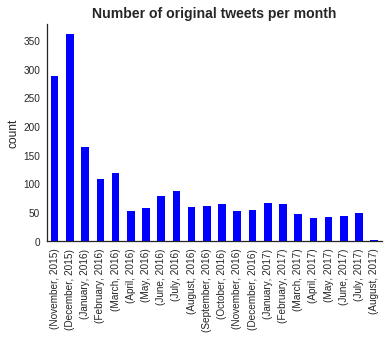

In [146]:
fig, ax = plt.subplots()
sns.set_style("white")
tweets_per_month.plot(kind='bar', color='b')
ax.set_title('Number of original tweets per month', fontsize=14, fontweight="bold")
ax.set_ylabel('count', fontsize=12)
ax.set_xlabel('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

November and December of 2015 were the most busy months for WeRateDogs twitter account with the number of original posted tweets exceeding 250 and 350 respectively. From April 2016 and onwards no month had more than 100 tweets posted.

#### In which day of the week WeRateDogs posted most of its original tweets?

In [147]:
sort_of_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday', 'Saturday']

In [148]:
plotting_days = pd.DataFrame(twitter_archive_master.groupby('Day_of_Week')['tweet_id'].count())

In [149]:
plotting_days.reset_index(inplace=True)
plotting_days = plotting_days.rename(columns={'tweet_id': 'count'})

In [150]:
plotting_days['Day_of_Week'] = plotting_days.Day_of_Week.astype("category")

In [151]:
plotting_days.Day_of_Week.cat.set_categories(sort_of_days, inplace=True)

In [152]:
plotting_days = plotting_days.sort_values('Day_of_Week')

In [153]:
plotting_days 

,Day_of_Week,count
1,Monday,321
5,Tuesday,292
6,Wednesday,292
4,Thursday,279
0,Friday,279
3,Sunday,253
2,Saturday,251


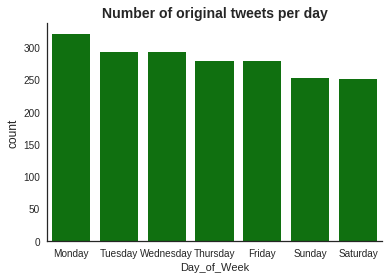

In [154]:
fig, ax = plt.subplots()
sns.set_style("white")
sns.barplot(x="Day_of_Week", y="count", data=plotting_days, color='g')
ax.set_title('Number of original tweets per day', fontsize=14, fontweight="bold")
ax.set_ylabel('count', fontsize=12)
plt.xticks(rotation='horizontal')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

It seems that WeRateDogs was more active on Mondays and less active on Saturdays. There is a decreasing trend in the number of tweets posted as we approach the end of the week.

#### In which hour of the day WeRateDogs posted most of its original tweets?

In [155]:
twitter_archive_master['Hour'].value_counts()

1     274
0     251
2     202
16    192
3     169
17    160
23    106
18    100
4      94
15     90
19     81
20     75
21     70
22     67
5      25
14      8
6       2
13      1
Name: Hour, dtype: int64

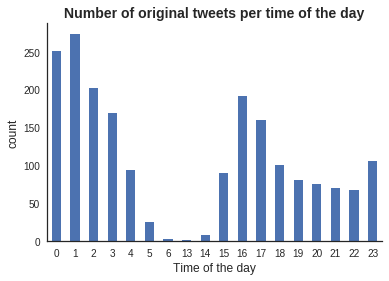

In [156]:
fig, ax = plt.subplots()
twitter_archive_master['Hour'].value_counts(sort=False).plot(kind='bar')
ax.set_title('Number of original tweets per time of the day', fontsize=14, fontweight="bold")
ax.set_ylabel('count', fontsize=12)
ax.set_xlabel('Time of the day', fontsize=12)
plt.xticks(rotation='horizontal') 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Most tweets were posted between midnight and 3 a.m. In general the account holder of WeRateDogs seems to be active from 3 p.m. until 5 a.m. every day.

#### Which was the most used Twitter app to post tweets by WeRateDogs?

In [157]:
twitter_archive_master['source'].value_counts() / len(twitter_archive_master) * 100

Twitter for iPhone    98.118963
Twitter Web Client     1.321810
TweetDeck              0.559227
Name: source, dtype: float64

WeRateDogs moderator clearly prefers tweeting from an iPhone (98% of the time).

#### For how many dogs a dog 'stage' is available?

In [158]:
twitter_archive_master['stage'].value_counts()/len(twitter_archive_master) * 100

unidentified    84.544992
pupper          10.218607
doggo            3.202847
puppo            1.118454
doggopupper      0.457550
floofer          0.355872
doggopuppo       0.050839
doggofloofer     0.050839
Name: stage, dtype: float64

Most dogs don't have a dog 'stage' (84%). More than 1 out of 10 dogs are identified as puppers (usually a younger dog).

#### For how many dog breed predictions the trained neural net was most confident? 

In [159]:
twitter_archive_master[twitter_archive_master['top_pred_conf'] == 1]

,tweet_id,text,rating_numerator,rating_denominator,name,url,source,stage,Date,Year,...,image_number,top_prediction,top_pred_conf,is_dog_top_pred,second_prediction,second_pred_conf,is_dog_sec_pred,third_prediction,third_pred_conf,is_dog_third_pred
1866,667866724293877760,This is Shaggy. He knows exactly how to solve the puzzle but can't talk. All he wants to do is help. 10/10 great guy,10,10,Shaggy,https://t.co/SBmWbfAg6X,Twitter for iPhone,unidentified,2015-11-21,2015,...,1,Prayer_Rug,1.0,False,Prayer_Rug,1.011300e-08,False,Doormat,1.740170e-10,False


For only one dog prediction the neural net was confident 100% for its accuracy. It predicted that there is no dog in the tweet image, instead a prayer rug is depicted. Looking at the pic here: https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg the algorithm clearly missed the dog and it was probably confused by the puzzle.

#### Which tweet was the most retweeted one in the dataset?

In [160]:
twitter_archive_master[twitter_archive_master['retweet_count'] == max(twitter_archive_master['retweet_count'])]

,tweet_id,text,rating_numerator,rating_denominator,name,url,source,stage,Date,Year,...,image_number,top_prediction,top_pred_conf,is_dog_top_pred,second_prediction,second_pred_conf,is_dog_sec_pred,third_prediction,third_pred_conf,is_dog_third_pred
773,744234799360020481,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad),13,10,None,https://t.co/7wE9LTEXC4,Twitter for iPhone,doggo,2016-06-18,2016,...,1,Ice_Bear,0.825333,True,Ice_Bear,0.044681,False,Whippet,0.018442,True


The most retweeted tweet was this one: https://t.co/7wE9LTEXC4 It shows a dog in a pool realizing that it can stand above the water even if he doesn't swim...It was retweeted 78,740 times.